## Predictive modeling of customer bookings

This Jupyter notebook includes code to get started with this predictive modeling task. This will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [9]:
mapping={
    'Internet':1,
    'Mobile': 2
}
df["sales_channel"]=df["sales_channel"].map(mapping)

In [10]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [11]:
mapping={
'RoundTrip':1, 'CircleTrip':2, 'OneWay':3
}
df["trip_type"]=df["trip_type"].map(mapping)

In [12]:
df['origin_code'] = df['route'].str[:3]
df['destination_code'] = df['route'].str[3:]
# One-Hot Encoding for Origin and Destination Codes
# Concatenate one-hot encoded columns to the DataFrame
# df = pd.concat([df, one_hot_origin, one_hot_destination], axis=1)


In [13]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin_code,destination_code
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,AKL,DEL


In [14]:
df["booking_origin"].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test = label_encoder.fit_transform(df['booking_origin'])
label_mapping = dict(zip(df['booking_origin'] , test))
df['booking_origin'] = label_encoder.fit_transform(df['booking_origin'])
print(label_mapping)
print(test)

{'New Zealand': 61, 'India': 36, 'United Kingdom': 100, 'China': 17, 'South Korea': 85, 'Japan': 43, 'Malaysia': 51, 'Singapore': 80, 'Switzerland': 90, 'Germany': 28, 'Indonesia': 37, 'Czech Republic': 21, 'Vietnam': 103, 'Thailand': 93, 'Spain': 86, 'Romania': 75, 'Ireland': 40, 'Italy': 42, 'Slovakia': 81, 'United Arab Emirates': 99, 'Tonga': 95, 'Réunion': 77, '(not set)': 0, 'Saudi Arabia': 78, 'Netherlands': 59, 'Qatar': 74, 'Hong Kong': 34, 'Philippines': 71, 'Sri Lanka': 87, 'France': 27, 'Croatia': 19, 'United States': 101, 'Laos': 48, 'Hungary': 35, 'Portugal': 73, 'Cyprus': 20, 'Australia': 4, 'Cambodia': 14, 'Poland': 72, 'Belgium': 9, 'Oman': 65, 'Bangladesh': 7, 'Kazakhstan': 45, 'Brazil': 11, 'Turkey': 97, 'Kenya': 46, 'Taiwan': 91, 'Brunei': 12, 'Chile': 16, 'Bulgaria': 13, 'Ukraine': 98, 'Denmark': 23, 'Colombia': 18, 'Iran': 38, 'Bahrain': 6, 'Solomon Islands': 83, 'Slovenia': 82, 'Mauritius': 54, 'Nepal': 58, 'Russia': 76, 'Kuwait': 47, 'Mexico': 55, 'Sweden': 89, 'A

In [16]:
test2 = label_encoder.fit_transform(df['route'])
label_mapping = dict(zip(df['route'] , test2))
df['route'] = label_encoder.fit_transform(df['route'])

print(label_mapping)
print(test2)

{'AKLDEL': 0, 'AKLHGH': 1, 'AKLHND': 2, 'AKLICN': 3, 'AKLKIX': 4, 'AKLKTM': 5, 'AKLKUL': 6, 'AKLMRU': 7, 'AKLPEK': 8, 'AKLPVG': 9, 'AKLTPE': 10, 'AORICN': 11, 'AORKIX': 12, 'AORKTM': 13, 'AORMEL': 14, 'BBIMEL': 17, 'BBIOOL': 18, 'BBIPER': 19, 'BBISYD': 20, 'BDOCTS': 21, 'BDOCTU': 22, 'BDOHGH': 23, 'BDOICN': 24, 'BDOIKA': 25, 'BDOKIX': 26, 'BDOMEL': 27, 'BDOOOL': 28, 'BDOPEK': 29, 'BDOPER': 30, 'BDOPUS': 31, 'BDOPVG': 32, 'BDOSYD': 33, 'BDOTPE': 34, 'BDOXIY': 36, 'BKICKG': 37, 'BKICTS': 38, 'BKICTU': 39, 'BKIHND': 41, 'BKIICN': 42, 'BKIKIX': 43, 'BKIKTM': 44, 'BKIMEL': 45, 'BKIMRU': 46, 'BKIOOL': 47, 'BKIPEK': 48, 'BKIPER': 49, 'BKIPUS': 50, 'BKIPVG': 51, 'BKISYD': 52, 'BKIXIY': 53, 'BLRICN': 54, 'BLRMEL': 55, 'BLRPER': 56, 'BLRSYD': 57, 'BOMMEL': 58, 'BOMOOL': 59, 'BOMPER': 60, 'BOMSYD': 61, 'BTJJED': 62, 'BTUICN': 64, 'BTUPER': 65, 'BTUSYD': 66, 'BTUWUH': 67, 'BWNCKG': 68, 'BWNDEL': 69, 'BWNHGH': 70, 'BWNIKA': 71, 'BWNKTM': 72, 'BWNMEL': 73, 'BWNOOL': 74, 'BWNPER': 75, 'BWNSYD': 76, '

In [17]:
df['flight_duration']=df['flight_duration']*24

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
X = df.drop(['booking_complete','origin_code','destination_code','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals'], axis=1)
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin_code,destination_code
0,2,1,1,262,19,7,6,0,61,1,0,0,132.48,0,AKL,DEL
1,1,1,1,112,20,3,6,0,61,0,0,0,132.48,0,AKL,DEL
2,2,1,1,243,22,17,3,0,36,1,1,0,132.48,0,AKL,DEL
3,1,1,1,96,31,4,6,0,61,0,0,1,132.48,0,AKL,DEL
4,2,1,1,68,22,15,3,0,36,1,0,1,132.48,0,AKL,DEL


Precision: 0.5203252032520326
Accuracy: 0.8535
Recall: 0.12972972972972974
f1: 0.20767982693347756
Area under curve score: 0.7673532070803197


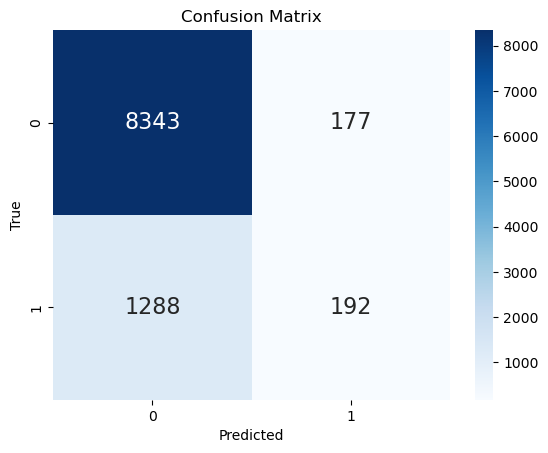

In [48]:
y_pred=rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
y_scores = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
auc_roc = roc_auc_score(y_test, y_scores)
print(f'Precision: {precision}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'f1: {f1}')
print(f'Area under curve score: {auc_roc}')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

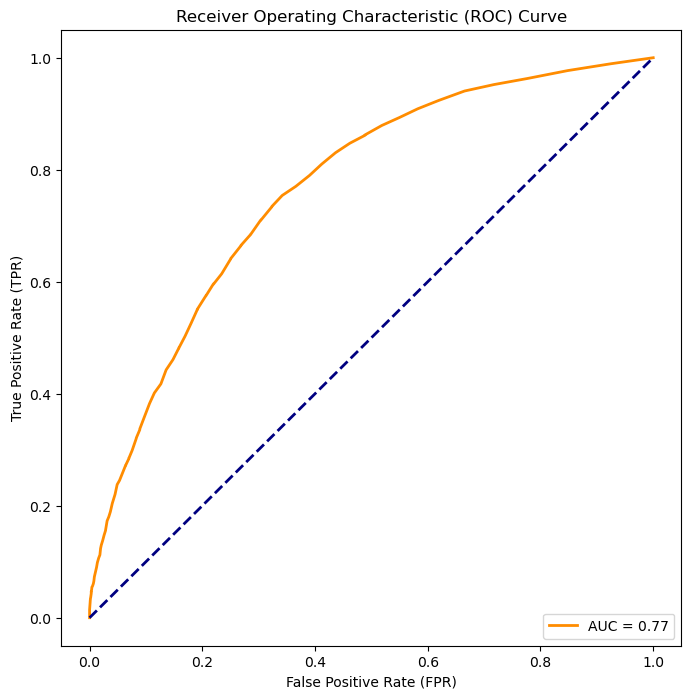

In [49]:

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

In [51]:
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importance=feature_importance.sort_values(ascending=False)

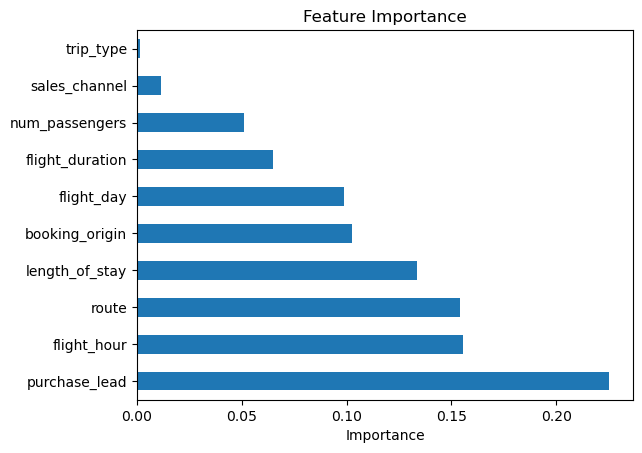

In [52]:
import matplotlib.pyplot as plt

# Assuming 'feature_importance' is the Series with your feature importances
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

Precision: 0.565068493150685
Accuracy: 0.8558
Recall: 0.11148648648648649
f1: 0.18623024830699775
Area under curve score: 0.7702221323436111


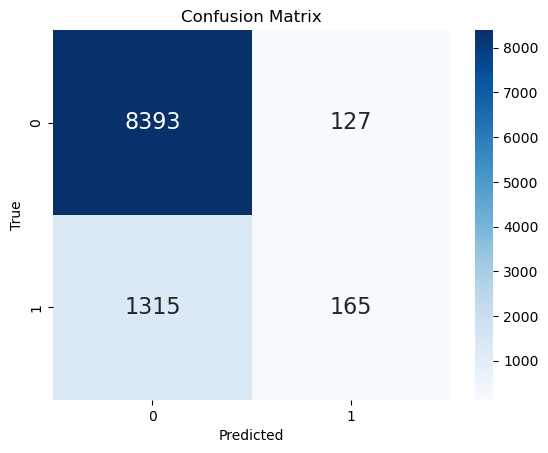

In [61]:
X = df.drop(['booking_complete','origin_code','destination_code',], axis=1)
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred=rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
y_scores = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
auc_roc = roc_auc_score(y_test, y_scores)
print(f'Precision: {precision}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'f1: {f1}')
print(f'Area under curve score: {auc_roc}')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


purchase_lead            0.193213
route                    0.152112
flight_hour              0.140628
length_of_stay           0.125033
booking_origin           0.108460
flight_day               0.091300
flight_duration          0.071906
num_passengers           0.050079
wants_in_flight_meals    0.022360
wants_preferred_seat     0.015855
wants_extra_baggage      0.015012
sales_channel            0.012364
trip_type                0.001678
dtype: float64


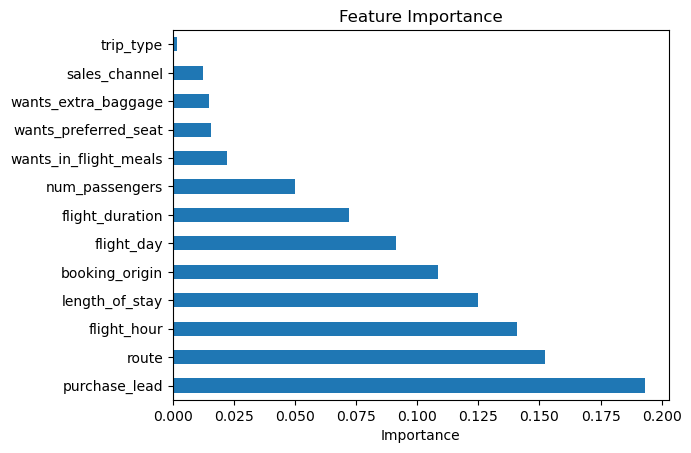

In [64]:
import matplotlib.pyplot as plt
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importance=feature_importance.sort_values(ascending=False)
print(feature_importance)
# Assuming 'feature_importance' is the Series with your feature importances
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

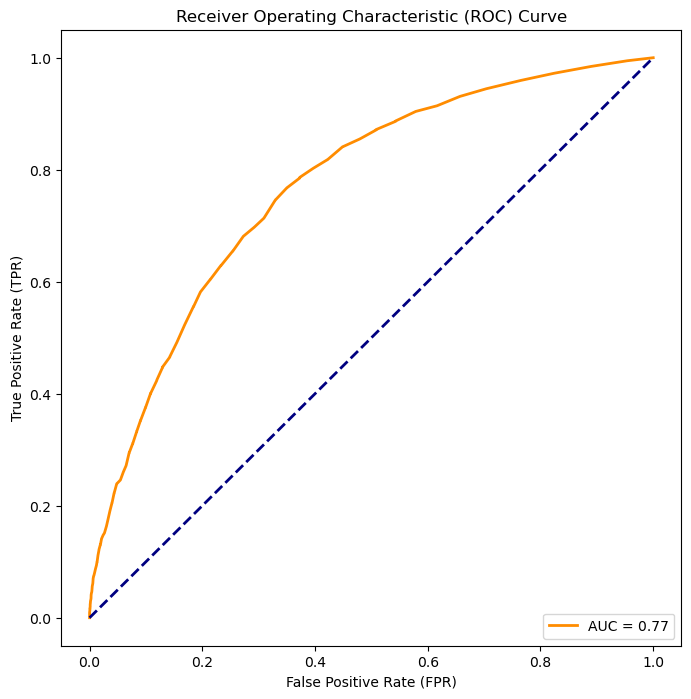

In [63]:

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()